## Traitement et Préparation d'un Ensemble de Données de Visages pour la Reconnaissance Faciale pour Moroccan Players

Marwa El Kamil

Ce notebook Python semble faire partie d'un script utilisé pour charger et traiter des images de visages à partir d'une base de données (BD). Voici une description détaillée de ce que fait chaque partie du script :

1. **Définition de la fonction `loadBD`** :
   - La fonction `loadBD` prend un chemin `inputPath` comme argument, qui est supposé être le chemin d'un répertoire contenant des images.
   - Elle utilise la bibliothèque `imutils.paths` pour lister toutes les images dans le répertoire spécifié.
   - Deux listes vides, `faces` et `labels`, sont initialisées pour stocker les visages extraits et leurs étiquettes respectives.

2. **Chargement du modèle de détection de visages** :
   - Un classificateur de cascade Haar (`haarcascade_frontalface_alt.xml`) est chargé en utilisant `cv2.CascadeClassifier`. Ce classificateur est utilisé pour détecter les visages dans les images.

3. **Boucle sur les chemins d'images** :
   - Le script boucle sur tous les chemins d'images trouvés.
   - Pour chaque image, elle est lue dans un tableau avec `cv2.imread`.
   - L'étiquette de l'image est extraite à partir du nom du dossier qui la contient, en supposant une structure de répertoire où le nom du dossier est l'étiquette de l'image.

4. **Détection et traitement des visages** :
   - Pour chaque image, le script essaie de détecter les visages avec la méthode `detectMultiScale`.
   - Lorsqu'un visage est détecté, il est découpé de l'image originale pour créer une `faceROI` (Region Of Interest), qui est ensuite redimensionnée à 100x100 pixels.
   - La `faceROI` est convertie en nuances de gris avec `cv2.cvtColor`.
   - La `faceROI` et l'étiquette sont ajoutées aux listes `faces` et `labels`.

5. **Gestion des exceptions** :
   - Si aucun visage n'est détecté ou s'il y a une autre erreur lors du traitement de l'image, le script continue à la prochaine image sans interrompre le processus.

6. **Conversion des listes en tableaux NumPy** :
   - Les listes `faces` et `labels` sont converties en tableaux NumPy.

7. **Retour des données** :
   - La fonction `loadBD` retourne un tuple contenant les tableaux de `faces` et `labels`.

8. **Chargement des données et enregistrement des visages** :
   - La fonction `loadBD` est appelée avec le chemin 'Data-Equipe Maroc' pour charger les données.
   - Une boucle parcourt tous les visages chargés et les enregistre en tant qu'images PNG, en nommant chaque fichier avec l'étiquette du visage et un index unique.

9. **Affichage d'une image** :
   - Enfin, le script affiche l'une des images de visage chargées (la 11ème image dans le tableau `faces`) en utilisant `matplotlib` avec une carte de couleurs en nuances de gris.

Le but de ce script est de préparer un ensemble de données de visages pour un éventuel apprentissage ou test de modèle en extrayant et en normalisant les visages à partir d'un ensemble d'images. Cela inclut la détection de visage, le redimensionnement, la conversion en niveaux de gris, et l'enregistrement des images pour une utilisation ultérieure.

### Importer les bibliotheques:

In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from imutils import paths
import numpy as np
import imutils
import cv2
import os

### Face detection:

In [21]:
def loadBD(inputPath):
    imagePaths = list(paths.list_images(inputPath))
   

    faces = list()
    labels = list()
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
 
    for imagePath in imagePaths:
        # read the image and grab the image label
        image = cv2.imread(imagePath)
        name = imagePath.split(os.path.sep)[-2]
       
        try:
            face = face_cascade.detectMultiScale(image,  scaleFactor=1.15,minNeighbors=5,minSize=(34, 35),flags=cv2.CASCADE_SCALE_IMAGE)
            x = face[0][0];  y= face[0][1]; w = face[0][2] ;h = face[0][3]
            faceROI = image[y:y+h , x:x+w]
            faceROI = cv2.resize(faceROI , (100 , 100))
            faceROI = cv2.cvtColor(faceROI , cv2.COLOR_BGR2GRAY)
            faces.append(faceROI)
            labels.append(name)
        except:
             continue
       
    faces = np.array(faces)
    labels = np.array(labels)
    return (faces , labels)

In [22]:
(faces , labels) = loadBD('Data-Equipe Maroc')

# Saving detected faces:

In [23]:
for i in range(len(faces)):
    cv2.imwrite(f'{labels[i]}_{i+100}.png',faces[i])


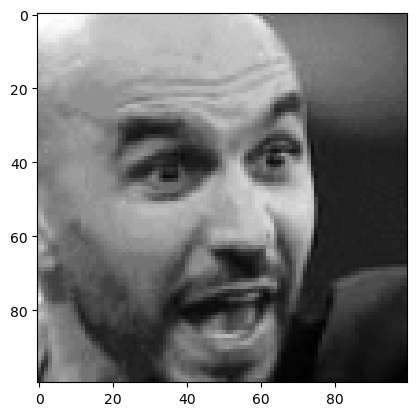

In [24]:
 plt.imshow(faces[10], cmap = 'gray')

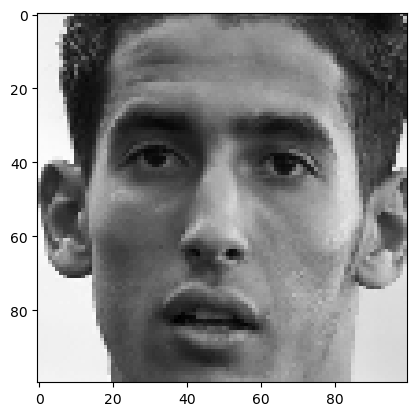

In [25]:
 plt.imshow(faces[26], cmap = 'gray')

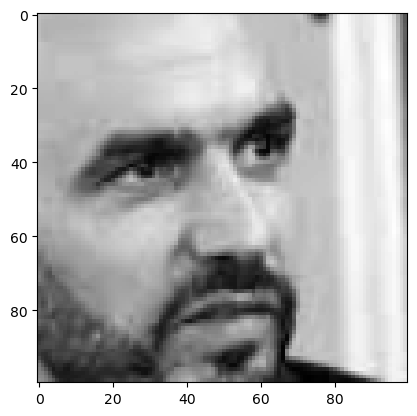

In [26]:
 plt.imshow(faces[20], cmap = 'gray')